In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate

In [177]:
unemp = pd.read_csv('UNRATE.csv')
unemp.DATE = pd.to_datetime(unemp.DATE)

In [178]:
rand_unemp_idx = np.random.randint(0, len(unemp), len(unemp)//10)
rand_unemp = unemp.drop(rand_unemp_idx, axis=0)

In [179]:
high_unemp_idx = unemp[unemp.UNRATE > 8].index
num_to_select = len(high_unemp_idx) // 2

high_unemp_idx = np.random.randint(0, len(unemp), num_to_select)
bias_unemp = unemp.drop(high_unemp_idx, axis=0)

In [180]:
# make all data
all_dates = unemp.DATE

rand_unemp = pd.merge(all_dates, rand_unemp, how='left', on='DATE')
bias_unemp = pd.merge(all_dates, bias_unemp, how='left', on='DATE')
rand_unemp['rpt'] = rand_unemp.UNRATE.isna()
bias_unemp['rpt'] = bias_unemp.UNRATE.isna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


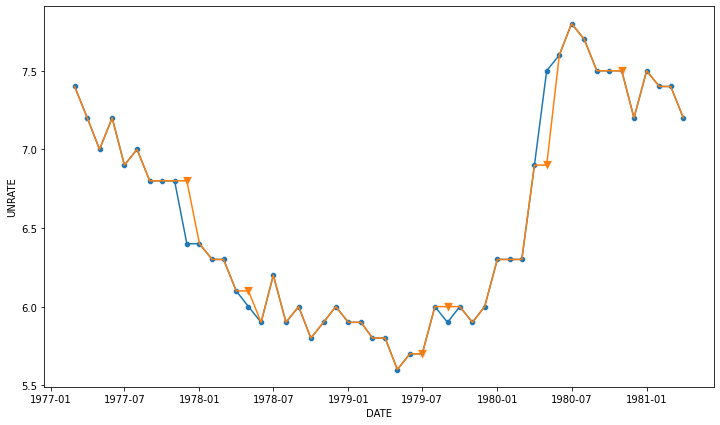

In [181]:
# forward fill
rand_unemp['impute.ff'] = rand_unemp.UNRATE.fillna(method='ffill')
bias_unemp['impute.ff'] = bias_unemp.UNRATE.fillna(method='ffill')

fig, ax = plt.subplots(figsize=(12,7))
# origianl graph
sns.scatterplot(data=unemp[350:400], x='DATE', y='UNRATE')
sns.lineplot(data=unemp[350:400], x='DATE', y='UNRATE')
# random missing value graph
sns.lineplot(data=rand_unemp[350:400], x='DATE', y='impute.ff')
sns.scatterplot(data=rand_unemp[350:400][rand_unemp['rpt'] == True], x='DATE', y='impute.ff', marker='v', s=100)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


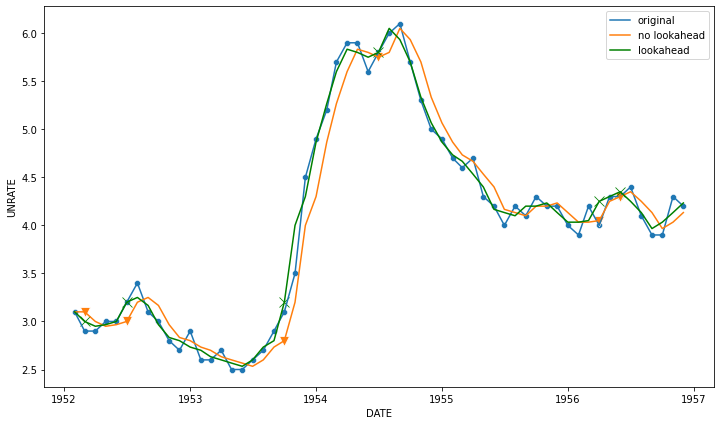

In [182]:
# moving average
rand_unemp['impute.rm.nolookahead'] = rand_unemp[['UNRATE']].rolling(3, min_periods=1).mean()
bias_unemp['impute.rm.nolookahead'] = bias_unemp[['UNRATE']].rolling(3, min_periods=1).mean()

rand_unemp['impute.rm.lookahead'] = rand_unemp[['UNRATE']].rolling(3, min_periods=1, center=True).mean()
bias_unemp['impute.rm.lookahead'] = bias_unemp[['UNRATE']].rolling(3, min_periods=1, center=True).mean()

fig, ax = plt.subplots(figsize=(12,7))
# origianl graph
sns.scatterplot(data=unemp[49:108], x='DATE', y='UNRATE')
sns.lineplot(data=unemp[49:108], x='DATE', y='UNRATE', label='original')
# random missing value graph
sns.lineplot(data=rand_unemp[49:108], x='DATE', y='impute.rm.nolookahead', label='no lookahead')
sns.scatterplot(data=rand_unemp[49:108][rand_unemp['rpt'] == True], x='DATE', y='impute.rm.nolookahead', marker='v', s=100)
sns.lineplot(data=rand_unemp[49:108], x='DATE', y='impute.rm.lookahead', color='green', label='lookahead')
sns.scatterplot(data=rand_unemp[49:108][rand_unemp['rpt'] == True], x='DATE', y='impute.rm.lookahead', marker='x', s=100, color='green')

plt.legend()
plt.show()

In [183]:
# linear interpolation
tmp1 = rand_unemp.set_index('DATE')
tmp2 = bias_unemp.set_index('DATE')
rand_unemp['impute.li'] = tmp1['UNRATE'].interpolate().values
bias_unemp['impute.li'] = tmp2['UNRATE'].interpolate().values